In [570]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [571]:
# Leitura do arquivo
base_dados = pd.read_csv("/content/drive/MyDrive/Analista de dados/Turbine_Data.csv")
base_dados

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,...,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,...,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,...,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,...,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468


In [572]:
# Preenchendo valores vazios por 0
base_dados = base_dados.dropna()
base_dados

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
70789,2019-05-06 14:10:00+00:00,-7.851491,39.308243,47.154927,45.736893,43.699357,43.699357,0.0,58.852308,56.782879,...,62.145290,46.003815,49.171875,44.80,-15.007223,0.672715,2.0,G01,44.80,2.212693
70791,2019-05-06 14:30:00+00:00,-5.565284,39.206277,40.058399,41.260297,41.260230,41.260230,0.0,48.911180,56.033333,...,61.282616,40.253338,44.515622,49.00,-10.851533,0.508198,2.0,G01,49.00,2.130019
70793,2019-05-06 14:50:00+00:00,-5.549332,39.194184,46.500652,39.576077,39.576122,39.576122,0.0,56.859428,55.873937,...,60.362536,46.003815,51.624993,61.50,-10.303578,0.715614,2.0,G01,61.50,2.347810
70794,2019-05-06 15:00:00+00:00,-5.768376,38.992667,46.419196,47.399521,48.299502,48.299502,0.0,56.761226,55.807661,...,59.855694,46.004238,51.900000,93.25,-12.594477,0.550434,129.0,G01,93.25,2.161460
70795,2019-05-06 15:10:00+00:00,-5.091456,38.686212,46.280597,50.363603,50.363691,50.363691,0.0,56.483241,55.451512,...,59.567618,46.007880,52.112507,138.50,-11.181515,0.251628,282.0,G01,138.50,1.913490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,...,58.148777,39.008931,36.476562,178.00,13.775785,9.234004,2.0,G01,178.00,3.533445
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,...,57.550367,39.006759,36.328125,178.00,8.088928,9.229370,2.0,G01,178.00,3.261231
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,...,57.099335,39.003815,36.131944,178.00,4.355978,9.236802,2.0,G01,178.00,3.331839
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,...,56.847239,39.003815,36.007805,190.00,12.018077,9.237374,2.0,G01,190.00,3.284468


In [573]:
# verificando estatística dados
base_dados.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,32728.000000,32728.000000,32728.000000,32728.000000,32728.000000,32728.000000,32728.0,32728.000000,32728.000000,32728.000000,32728.000000,32728.000000,32728.000000,32728.000000,32728.000000,32728.000000,32728.000000,3.272800e+04,32728.000000,32728.000000
mean,607.840928,28.378727,42.742687,10.555275,10.902790,10.902790,0.0,63.719827,56.990465,1079.376949,71.384946,70.736515,36.468856,39.540297,205.041502,118.310822,9.675778,4.243325e+03,205.041502,5.872632
std,599.836468,4.205799,4.922749,21.721773,21.500036,21.500036,0.0,9.900544,6.790651,533.671011,22.821102,22.828615,4.297957,4.967562,88.885437,121.773864,4.794777,4.971670e+05,88.885437,2.613576
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.962305
25%,80.365886,25.050222,39.665219,-0.947121,-0.441117,-0.441117,0.0,57.516721,53.227208,1029.756504,54.868977,54.122687,33.009858,35.743424,160.000000,14.782511,9.229644,2.000000e+00,160.000000,3.904638
50%,398.204068,27.916000,42.196913,0.273754,0.764955,0.764955,0.0,64.416338,56.775049,1106.103111,65.019659,64.224235,36.050614,39.165874,181.833333,78.617898,9.917955,2.000000e+00,181.833333,5.537468
75%,1046.512665,31.292233,46.301676,9.147051,9.540878,9.540878,0.0,69.517630,60.293528,1483.915748,83.343180,82.743707,39.350726,43.100001,271.000000,202.887518,13.306120,2.000000e+00,271.000000,7.433905
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1793.657150,126.773031,126.043018,47.996185,54.230154,357.000000,363.354454,16.070668,6.574653e+07,357.000000,22.970893


In [574]:
# Pre-processamento dos dados
base_dados['Unnamed: 0'] = pd.to_datetime(base_dados['Unnamed: 0'])
base_dados = base_dados.set_index('Unnamed: 0')
base_dados = base_dados.rename_axis('Data')
base_dados.drop('WTG', axis=1, inplace= True)
base_dados['Year'] = base_dados.index.year
base_dados['Month'] = base_dados.index.month
base_dados['Day'] = base_dados.index.day
base_dados['Hour'] = base_dados.index.hour
base_dados['Minute'] = base_dados.index.minute
base_dados['Situation'] = base_dados['ActivePower'].apply(lambda x: "Ganho" if x > 0 else ("Perda" if x < 0 else "Nada"))

base_dados


<ipython-input-574-067baee9397b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_dados['Unnamed: 0'] = pd.to_datetime(base_dados['Unnamed: 0'])


,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,RotorRPM,TurbineStatus,WindDirection,WindSpeed,Year,Month,Day,Hour,Minute,Situation
Data,,,,,,,,,,,,,,,,,,,,,
2019-05-06 14:10:00+00:00,-7.851491,39.308243,47.154927,45.736893,43.699357,43.699357,0.0,58.852308,56.782879,68.210284,...,0.672715,2.0,44.80,2.212693,2019,5,6,14,10,Perda
2019-05-06 14:30:00+00:00,-5.565284,39.206277,40.058399,41.260297,41.260230,41.260230,0.0,48.911180,56.033333,68.229411,...,0.508198,2.0,49.00,2.130019,2019,5,6,14,30,Perda
2019-05-06 14:50:00+00:00,-5.549332,39.194184,46.500652,39.576077,39.576122,39.576122,0.0,56.859428,55.873937,85.012009,...,0.715614,2.0,61.50,2.347810,2019,5,6,14,50,Perda
2019-05-06 15:00:00+00:00,-5.768376,38.992667,46.419196,47.399521,48.299502,48.299502,0.0,56.761226,55.807661,63.945036,...,0.550434,129.0,93.25,2.161460,2019,5,6,15,0,Perda
2019-05-06 15:10:00+00:00,-5.091456,38.686212,46.280597,50.363603,50.363691,50.363691,0.0,56.483241,55.451512,21.339981,...,0.251628,282.0,138.50,1.913490,2019,5,6,15,10,Perda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,1029.870744,...,9.234004,2.0,178.00,3.533445,2020,3,30,23,10,Ganho
2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,1030.160478,...,9.229370,2.0,178.00,3.261231,2020,3,30,23,20,Ganho
2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,1030.137822,...,9.236802,2.0,178.00,3.331839,2020,3,30,23,30,Ganho


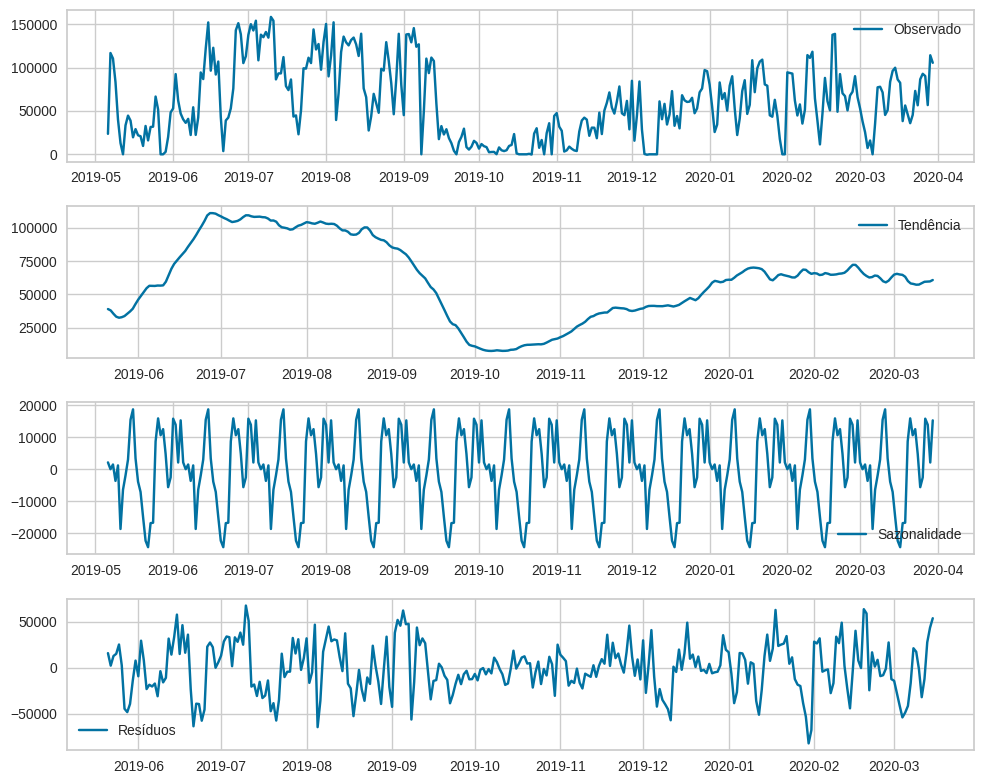

In [575]:
# Quantidade de energia ganha por dia
Energia_gerada = base_dados.resample('d').sum()

# Realizar a decomposição da série temporal para ActivePower
decomposicao = seasonal_decompose(Energia_gerada['ActivePower'], model='additive', period = 30)

# Plotar os componentes da decomposição
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(decomposicao.observed, label='Observado')
plt.legend()

plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência')
plt.legend()

plt.subplot(413)
plt.plot(decomposicao.seasonal, label='Sazonalidade')
plt.legend()

plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos')
plt.legend()


plt.tight_layout()
plt.show()

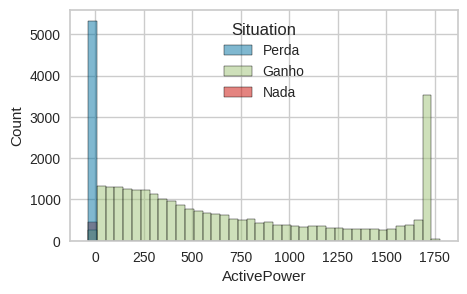

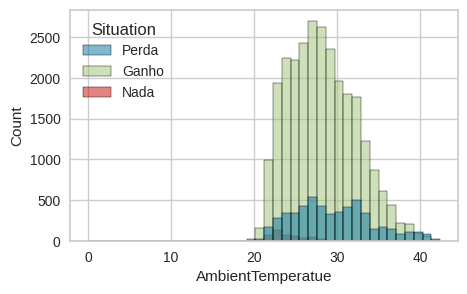

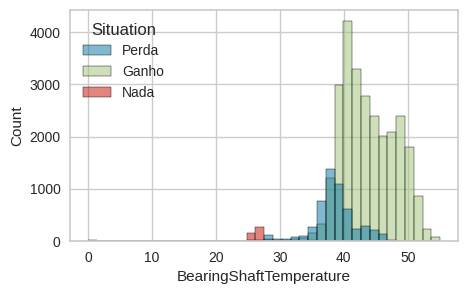

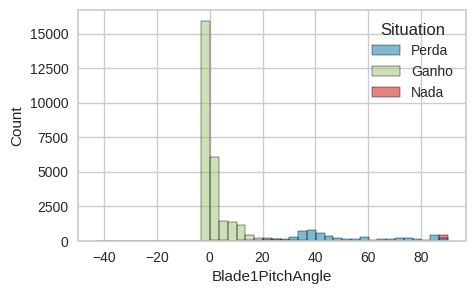

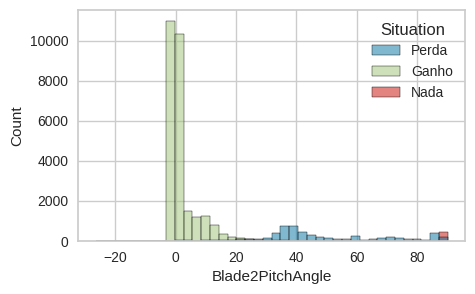

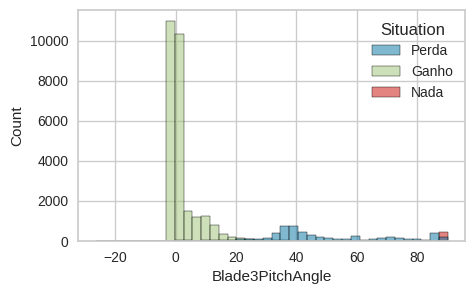

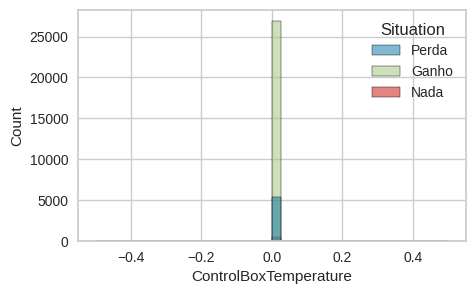

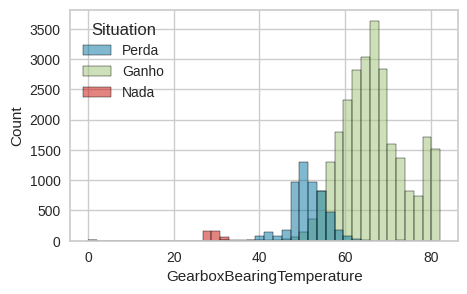

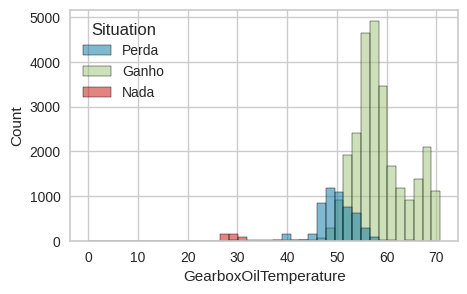

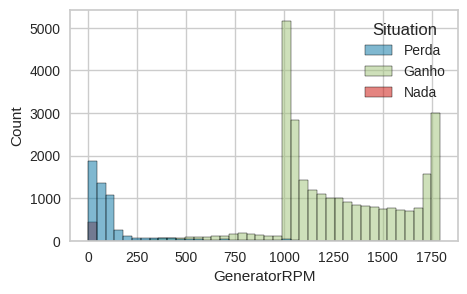

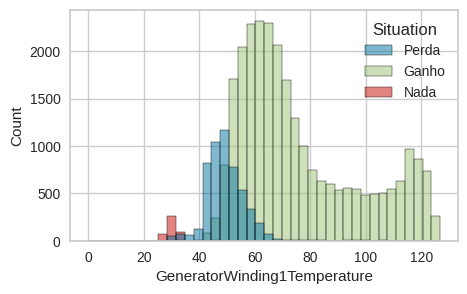

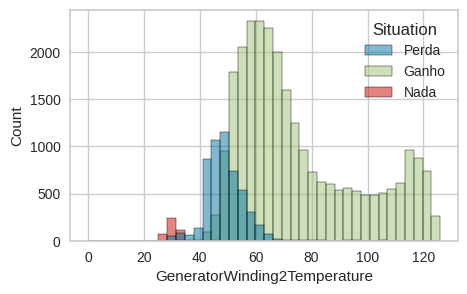

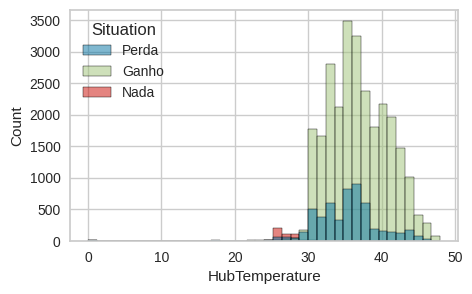

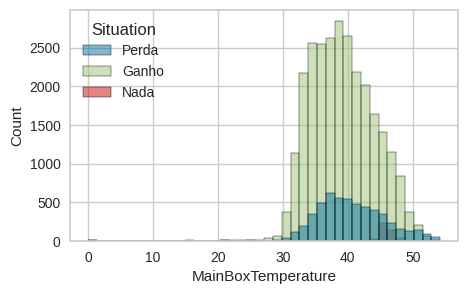

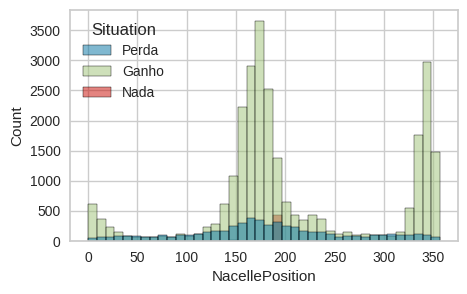

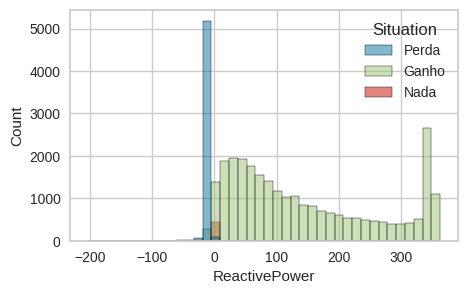

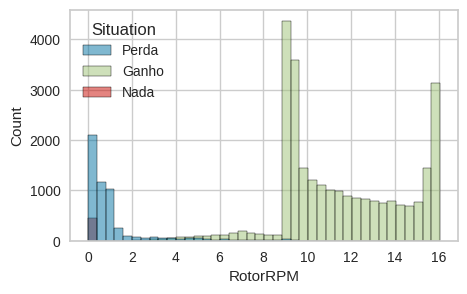

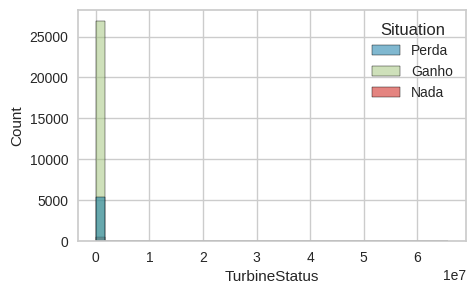

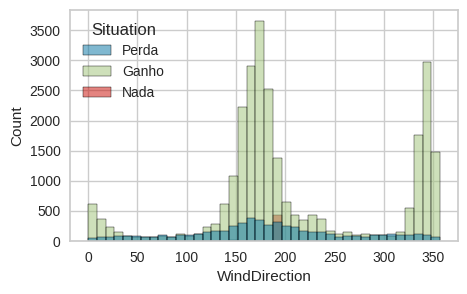

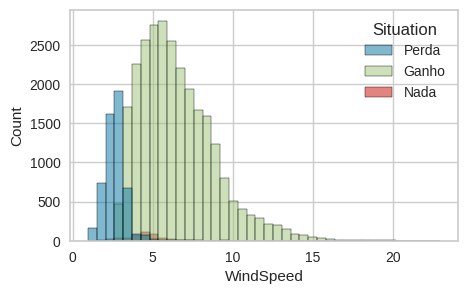

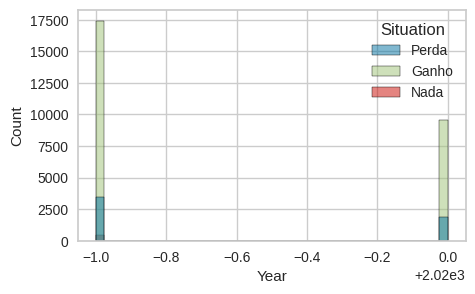

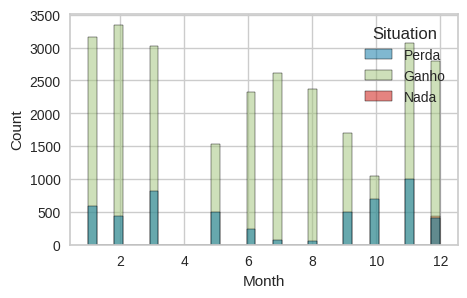

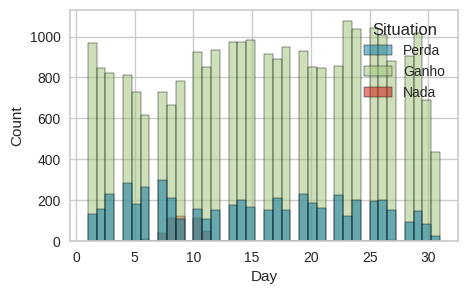

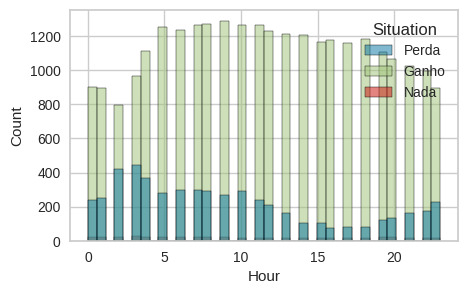

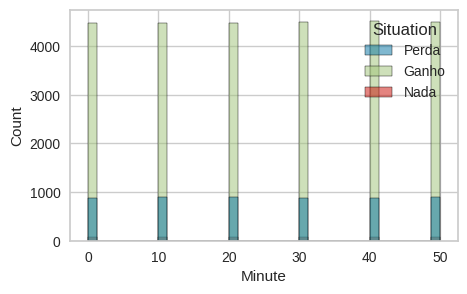

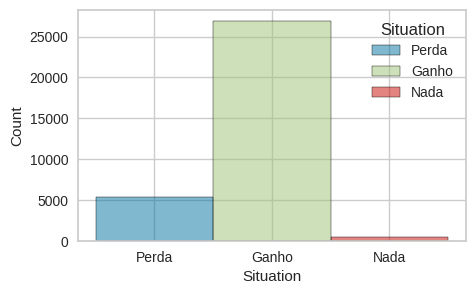

In [577]:

# Histograma em relação com relação DEATH_EVENT
for i in base_dados.columns:
  plt.figure(figsize=(5,3 ))
  sns.histplot(base_dados, x=i, hue="Situation",bins=40)
  plt.show()

In [578]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
base_dados = base_dados.drop('Situation', axis=1)

In [579]:
base_dados.shape

(32728, 25)

In [580]:
# Separando treino e teste
x_feature_train = base_dados.iloc[:6557].drop("ActivePower",axis=1)
x_feature_test = base_dados.iloc[6557:].drop("ActivePower",axis=1)
y_class_train = base_dados.iloc[:6557]["ActivePower"]
y_class_test = base_dados.iloc[6557:]["ActivePower"]


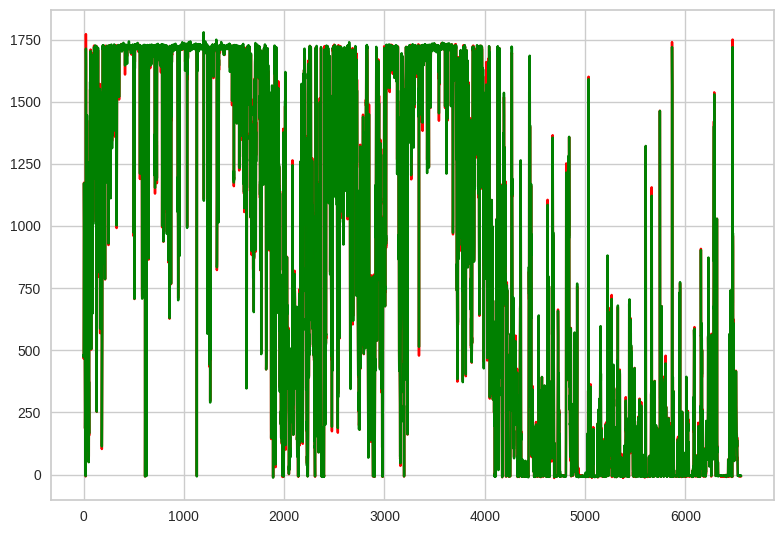

In [581]:
# Iniciando modelo de XGBRegressor
import xgboost as xgb

# Criar o modelo de XGBRegressor
model = xgb.XGBRegressor()

# Treinar o modelo com os dados de treino
model.fit(x_feature_train, y_class_train)

# Fazer previsões nos dados de teste
predict = model.predict(x_feature_test)

plt.plot(range(6557),predict[:6557],color="red",label="prediction")
plt.plot(range(6557),y_class_test[:6557],color="green",label="réel")
plt.tight_layout()

In [582]:
print("mean_squared_error : {}".format(mean_squared_error(predict,y_class_test)))
print("mean_absolute_error : {}".format(mean_absolute_error(predict,y_class_test)))
print("r2_score : {}".format(r2_score(predict,y_class_test)))
print("mean_absolute_percentage_error : {}".format(mean_absolute_percentage_error(predict,y_class_test)))

mean_squared_error : 16772.84664095289
mean_absolute_error : 22.54486180953086
r2_score : 0.9458596508741002
mean_absolute_percentage_error : 0.9153320587536785
